# Step 1: Load your data, including testing/training split from Project 1.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # unzip the file 
# !unzip /content/drive/MyDrive/CUNY/DATA_71200_Advanced_Data_Analysis_Methods/Project/Company_Bankruptcy_Prediction.zip

Archive:  /content/drive/MyDrive/CUNY/DATA_71200_Advanced_Data_Analysis_Methods/Project/Company_Bankruptcy_Prediction.zip
  inflating: data.csv                


## Import Necessary Packages

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b42b214625f1ef4d9ed49fb121006793902791aa5ee79c1993679bdb7f7ed4e5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [6]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.6 MB/s 


In [7]:
input_path = './'

In [8]:
bank_data = pd.read_csv(input_path + 'data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
labels = bank_data['Bankrupt?']
data_norm = bank_data.drop(labels='Bankrupt?', axis=1)

In [10]:
# Splitting Train and Test Data, stratify = labels

X_train,X_test,y_train,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)




# Step 2: PCA for feature selection

For answer the question of "How many features are required to retain to capture 95% of the variance?" In my dataset, It's requested 53 features to archived 95% of the variance.

### Run PCA on unscaled data

Text(0, 0.5, 'Second principal component')

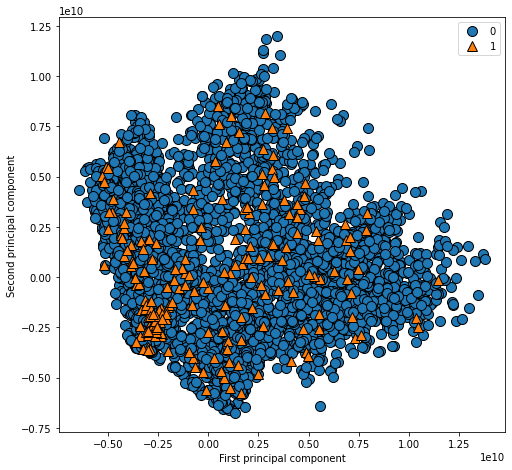

In [11]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(X_train)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train)
plt.legend(['0', '1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

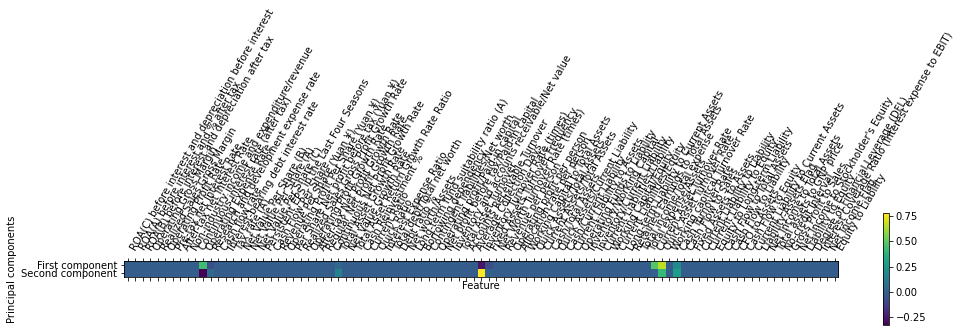

In [12]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Scale data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

### Run PCA on scaled data

Text(0, 0.5, 'bankruptcy')

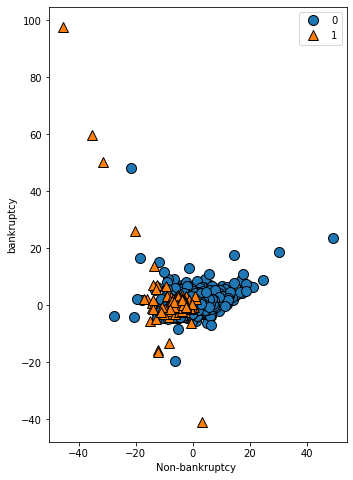

In [14]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)
plt.legend(['0', '1'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Non-bankruptcy ")
plt.ylabel("bankruptcy")

Text(0, 0.5, 'Principal components')

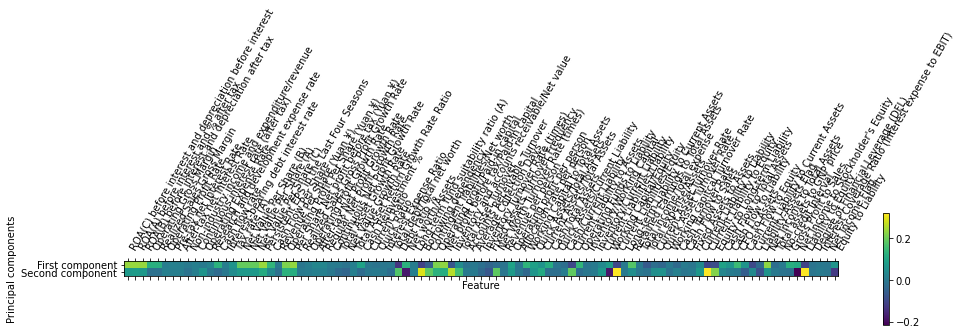

In [15]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Explained Variance in PCA

In [16]:
# keep all the principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[1.33468598e-01 7.19638007e-02 5.04739470e-02 4.74186594e-02
 4.24954664e-02 3.29732605e-02 3.08007075e-02 2.93122074e-02
 2.76556814e-02 2.15691476e-02 2.09923405e-02 1.98987104e-02
 1.83896956e-02 1.79738587e-02 1.61134749e-02 1.58790962e-02
 1.50409688e-02 1.42193962e-02 1.35230307e-02 1.27677644e-02
 1.26299116e-02 1.21679055e-02 1.16430072e-02 1.12392832e-02
 1.11432728e-02 1.09895282e-02 1.07732782e-02 1.07295687e-02
 1.06832063e-02 1.04630058e-02 1.03375745e-02 1.02213501e-02
 1.01806527e-02 1.01687585e-02 9.99693739e-03 9.77954174e-03
 9.68276480e-03 9.43388940e-03 9.13353055e-03 9.06617346e-03
 8.76467674e-03 8.73460998e-03 8.23467642e-03 8.00925977e-03
 7.68209805e-03 7.61232204e-03 7.36979833e-03 6.70117788e-03
 6.19345776e-03 5.79458242e-03 5.71945630e-03 5.37927759e-03
 5.05785787e-03 4.88302157e-03 4.40788320e-03 4.23369453e-03
 4.00027875e-03 3.48477354e-03 3.31777542e-03 2.76734035e-03
 2.56628626e-03 2.26

In [17]:
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('How many features are required to retain to capture 95% of the variance?')
print(len(pca4.explained_variance_ratio_))

How many features are required to retain to capture 95% of the variance?
53


## PCA as a pre-processing step for KNeighborsClassifier

Based on Project_2, the optimal params within KNeighborsClassifier in my dataset is {'metric': 'chebyshev', 'n_neighbors': 9, 'weights': 'distance'}. 


If not No Pre-Processing with PCA(), Accuracy on test set: 0.9670


If Pre-Processing with PCA(n_components=0.95), Accuracy on test set: 0.9677

Considering that my data set has 95 dimensions, it can indeed help improve the accuracy of the model after dimensionality reduction.

In [18]:
from sklearn.preprocessing import StandardScaler

data2 = data_norm

scaler = StandardScaler()
scaler.fit(data2)
X2_scaled = scaler.transform(data2)
labels = np.array(labels)
type(labels)

numpy.ndarray

### No Pre-Processing

In [19]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_scaled[train_index]
    X2_test = X2_scaled[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]
    


model = KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 9, weights= 'distance').fit(X2_train, y2_train)

print("Accuracy on training set: {:.4f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.4f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9670


### Two Principal Components

In [20]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X2_scaled)
# transform data onto the first two principal components
X2_pca2 = pca2.transform(X2_scaled)

for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_pca2[train_index]
    X2_test = X2_pca2[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]

#model=LogisticRegression().fit(X2_train, y2_train)
model = KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 9, weights= 'distance').fit(X2_train, y2_train)

print("Accuracy on training set: {:.4f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.4f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9626


### 95% of Variance Explained

In [21]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_pca4[train_index]
    X2_test = X2_pca4[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]
    
#model=LogisticRegression().fit(X2_train, y2_train)
model = KNeighborsClassifier(metric= 'chebyshev', n_neighbors= 9, weights= 'distance').fit(X2_train, y2_train)

print("Accuracy on training set: {:.4f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.4f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9677


## PCA as a pre-processing step for Support Vector Machines

Based on Project_2, the optimal params within Support Vector Machines in my dataset is is {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}. 


If not No Pre-Processing with PCA(), Accuracy on test set: 0.9677419355


If Pre-Processing with PCA(n_components=0.95), Accuracy on test set: 0.9677419355

Considering that Support Vector Machines already reduced dimensionality, Whether or not PCA() is used has no effect on the accuracy.

### No Pre-Processing

In [22]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_scaled[train_index]
    X2_test = X2_scaled[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]
    

model = SVC(C=0.01, gamma=0.01, kernel='rbf').fit(X2_train, y2_train)

print("Accuracy on training set: {:.10f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.10f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 0.9677360220
Accuracy on test set: 0.9677419355


### Two Principal Components

In [23]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X2_scaled)
# transform data onto the first two principal components
X2_pca2 = pca2.transform(X2_scaled)

for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_pca2[train_index]
    X2_test = X2_pca2[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]

model = SVC(C=0.01, gamma=0.01, kernel='rbf').fit(X2_train, y2_train)

print("Accuracy on training set: {:.10f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.10f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 0.9677360220
Accuracy on test set: 0.9677419355


### 95% of Variance Explained

In [24]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


for train_index, test_index in split.split(X2_scaled, labels):
    X2_train = X2_pca4[train_index]
    X2_test = X2_pca4[test_index]
    y2_train = labels[train_index]
    y2_test = labels[test_index]
    
model = SVC(C=0.01, gamma=0.01, kernel='rbf').fit(X2_train, y2_train)

print("Accuracy on training set: {:.10f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.10f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 0.9677360220
Accuracy on test set: 0.9677419355


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.

# k-Means

## k-Means on bank_data dataset

## k-Means without PCA()

In [26]:
from sklearn.preprocessing import StandardScaler

data2 = data_norm

scaler = StandardScaler()
scaler.fit(data2)
X2_scaled = scaler.transform(data2)
labels = np.array(labels)
type(labels)

numpy.ndarray

Text(0, 0.5, 'Feature 2')

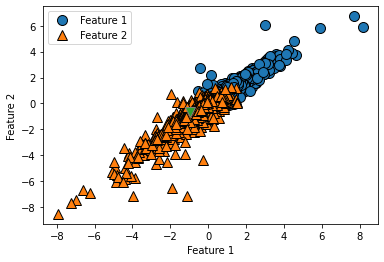

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_scaled[train_index]
    X_test = X2_scaled[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_


mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Feature 1", "Feature 2"], loc="best")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

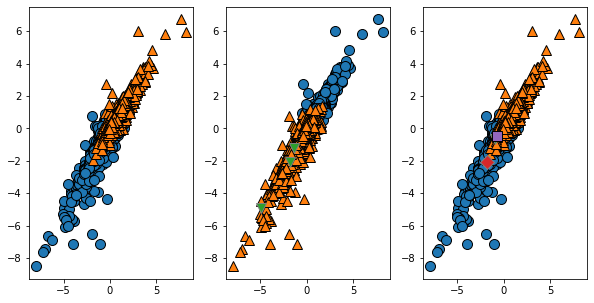

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[2])

### Elbow plot to find optimal number of clusters

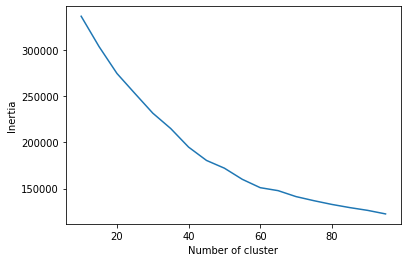

In [29]:
inertiaVals = {}

for k in range(10, 100, 5):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

## k-Means with PCA()

Text(0, 0.5, 'Feature 2')

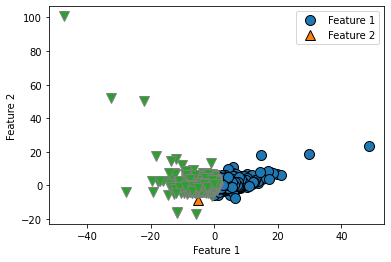

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans

# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_pca4[train_index]
    X_test = X2_pca4[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]
    

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_


mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments)
plt.legend(["Feature 1", "Feature 2"], loc="best")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

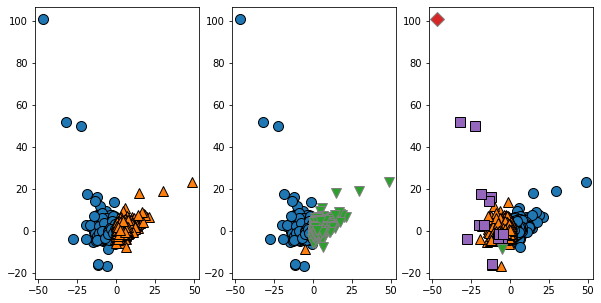

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignments, ax=axes[2])

# Elbow plot to find optimal number of clusters

## Elbow plot Without PCA()

In [38]:
for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_scaled[train_index]
    X_test = X2_scaled[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

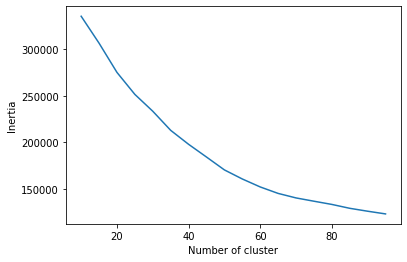

In [39]:
inertiaVals = {}

for k in range(10, 100, 5):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

## Elbow plot With PCA()

In [40]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_pca4[train_index]
    X_test = X2_pca4[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

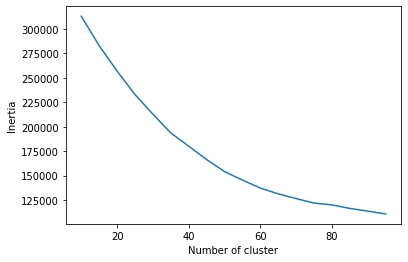

In [41]:
inertiaVals = {}

for k in range(10, 100, 5):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train)
    inertiaVals[k] = kmeansTmp.inertia_ 
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

# Agglomerative Clustering

## Agglomerative Clustering Without PCA()

In [42]:
for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_scaled[train_index]
    X_test = X2_scaled[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

Text(0, 0.5, 'Feature 1')

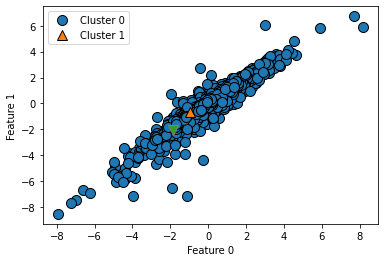

In [43]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

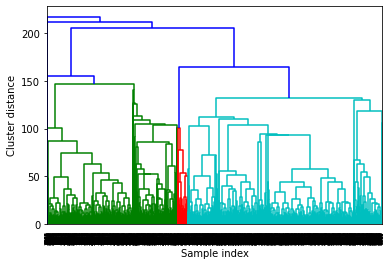

In [44]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## Agglomerative Clustering With PCA()

In [45]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_pca4[train_index]
    X_test = X2_pca4[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

Text(0, 0.5, 'Feature 1')

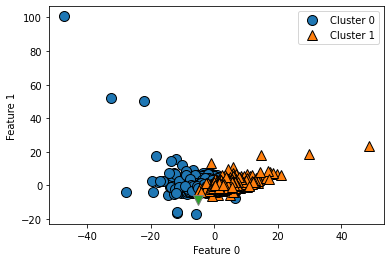

In [46]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

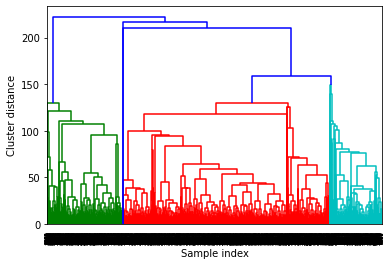

In [47]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# DBSCAN

## DBSCAN Without PCA()

In [48]:
for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_scaled[train_index]
    X_test = X2_scaled[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

Text(0, 0.5, 'Feature 1')

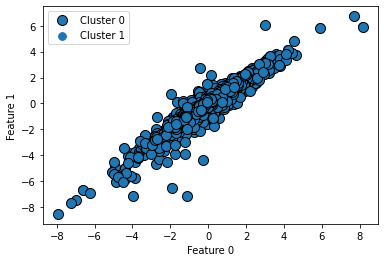

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

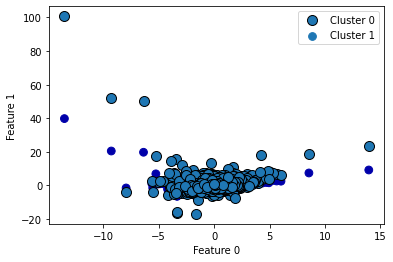

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## DBSCAN With PCA()

In [50]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X2_scaled, labels):
    X_train = X2_pca4[train_index]
    X_test = X2_pca4[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

Text(0, 0.5, 'Feature 1')

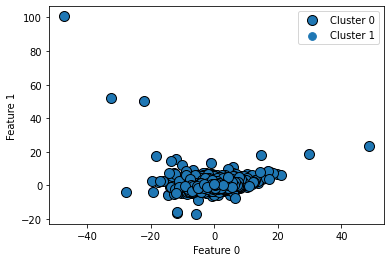

In [51]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=2,eps=0.5)
clusters = dbscan.fit_predict(X_train)

# plot the cluster assignments
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

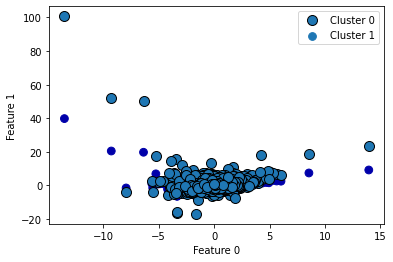

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

dbscan = DBSCAN(min_samples=5,eps=0.3)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_scaled[:, 0], X_train[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 5"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")